# Content and Objective

+ Show effects of segmented convolution

In [1]:
# importing
import numpy as np
import scipy.signal
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 8) )

### define segmented convolution

In [3]:
def seg_conv( x, h, len_seg ):
    '''
    gets segmented convolution by first sub-dividing input signal, then convolving and finally adding up
    
    IN: x, h, length of segments to be used
        for simplicity, it is assumed that length of a segment divides length of x
    
    OUT: result of convolution
    '''

    assert len(x) % len_seg == 0, "Length of x has to be divisible by the length of a segment!"
    
    # get some parameters
    numb_seg = len( x ) // len_seg

    # init array of slices where length of rows equals results of row-wise convolution
    x_seg = np.zeros( ( numb_seg, len_seg ) )
    y_seg = np.zeros( ( numb_seg, len_seg + len(h) - 1 ) )

    
    # get segments
    for _n in range( len(x) // len_seg ):
        x_seg[ _n, : ] = x[ _n * len_seg : ( _n + 1 ) * len_seg ]
 
    # apply convolution
    for _n in range( len(x) // len_seg ):
        y_seg[ _n, : ] = np.convolve( x_seg[ _n, : ], h )
     
    # add results of segmented convolutions
    y = np.zeros( len(x) + len(h) - 1 )
    for _n in range( len(x) // len_seg ):
        y[ _n * len_seg : _n * len_seg + len_seg + len(h) - 1 ] += y_seg[ _n, : ]
        
    return y
    

### define impulse response and input signal

In [4]:
# define impulse response
h = np.ones( 100 )
#h = np.array( [ 1, 2, 3, 4 ])

h /= np.sqrt( np.linalg.norm( h ) )

In [5]:
# define input signal
N_x = int( 1e3 ) 

x = np.random.randn( N_x )
#x = np.array( range( N_x ) )

In [6]:
# standard convolution
y = np.convolve( x, h )

In [7]:
# segmented convolution
y_seg = seg_conv( x, h, 10 )

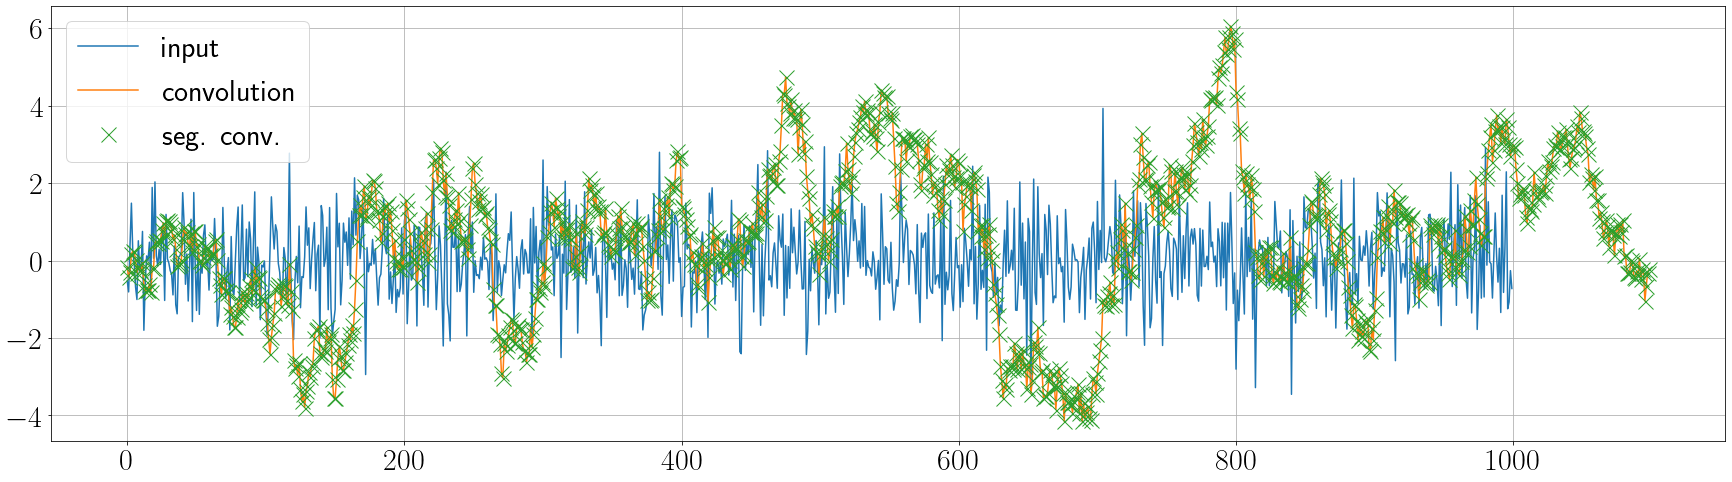

In [8]:
plt.plot( x, label='input' )

plt.plot( y, label='convolution' )
plt.plot( y_seg, 'x', ms=15, label='seg. conv.' )

plt.grid(1)
plt.legend()